# 参考
[geopandas官方说明 棒！](http://geopandas.org/mergingdata.html?highlight=merge)<br>
[pandas官方说明 必须看](http://pandas.pydata.org/pandas-docs/stable/10min.html)<br>
[colormap色域代码](https://matplotlib.org/examples/color/colormaps_reference.html)<br>
[案例 Python空间数据可视化利器之Geopandas](https://zhuanlan.zhihu.com/p/22914622)<br>

# 加载文件头

In [36]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import geopandas as gpd

**设置中文显示**

In [37]:
from pylab import mpl
mpl.rcParams['font.sans-serif'] = ['FangSong'] # 指定默认字体
mpl.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题

# 读取shp地图文件，引入为geodataframe对象

In [38]:
shp_ys=gpd.read_file('E:\map data for python\shp china wirh sourhsea nine lines\china bou2_4l.shp', encoding = 'gb18030')#读取shp文件

**初步查看shp文件内容**

In [39]:
shp_ys.head(8)

,FNODE_,TNODE_,LPOLY_,RPOLY_,LENGTH,BOU2_4M_,BOU2_4M_ID,GBCODE,geometry
0,2,7,2,3,7.743,1,23,61030,LINESTRING (121.4884414672852 53.3326492309570...
1,7,12,2,3,6.426,2,15,61031,"LINESTRING (125.35986328125 51.60979843139648,..."
2,12,16,2,3,2.006,3,80,61031,LINESTRING (124.7418670654297 48.9206924438476...
3,16,21,2,3,2.281,4,99,61030,LINESTRING (124.2672882080078 48.5298576354980...
4,21,23,2,3,0.587,5,75,61031,LINESTRING (122.3889236450195 47.3440093994140...
5,26,27,2,3,0.277,6,77,61031,LINESTRING (123.3129730224609 47.0062255859375...
6,28,26,2,3,0.244,7,89,61030,LINESTRING (123.3081665039063 46.8497238159179...
7,27,29,2,3,0.480,8,90,61032,LINESTRING (123.526496887207 46.95620727539063...


**查看index索引**

In [40]:
shp_ys.index

RangeIndex(start=0, stop=1785, step=1)

该geodataframe对象的index索引为自动创建，是0~1785，以1为间隔的range数列

**查看columns列名称**

In [41]:
shp_ys.columns

Index(['FNODE_', 'TNODE_', 'LPOLY_', 'RPOLY_', 'LENGTH', 'BOU2_4M_',
       'BOU2_4M_ID', 'GBCODE', 'geometry'],
      dtype='object')

**用geodataframe对象的.describe()方法查看数据的描述性统计信息

In [42]:
shp_ys.describe()

,FNODE_,TNODE_,LPOLY_,RPOLY_,LENGTH,BOU2_4M_,BOU2_4M_ID,GBCODE
count,1785.000000,1785.000000,1785.000000,1785.000000,1785.000000,1785.000000,1785.000000,1785.000000
mean,927.574790,929.905882,128.782073,210.784874,0.542120,893.000000,17259.982633,35583.217367
std,586.838197,585.578736,241.160363,276.263779,1.354553,515.429433,16298.766414,15643.654356
min,1.000000,1.000000,1.000000,1.000000,0.004000,1.000000,1.000000,26010.000000
25%,433.000000,432.000000,1.000000,1.000000,0.030000,447.000000,219.000000,26010.000000
50%,876.000000,880.000000,1.000000,65.000000,0.070000,893.000000,26010.000000,26010.000000
75%,1344.000000,1344.000000,204.000000,327.000000,0.235000,1339.000000,26010.000000,61010.000000
max,2131.000000,2131.000000,925.000000,926.000000,16.713000,1785.000000,61156.000000,99001.000000


**查看指定列数据，这里主要看一看GBCODE列**

In [43]:
shp_ys['GBCODE'] #注意，没有逗号，有引号。不是shp_ys，['GBCODE']

0       61030
1       61031
2       61031
3       61030
4       61031
5       61031
6       61030
7       61032
8       61030
9       61031
10      61030
11      61030
12      61032
13      61031
14      61031
15      61030
16      61030
17      61033
18      61030
19      61031
20      61033
21      61030
22      61033
23      61030
24      61030
25      61030
26      61030
27      61031
28      61030
29      61031
        ...  
1755    26080
1756    26080
1757    26080
1758    26080
1759    26080
1760    26100
1761    26010
1762    26100
1763    26100
1764    61010
1765    26010
1766    26100
1767    26010
1768    26010
1769    61010
1770    26080
1771    26080
1772    26080
1773    26080
1774    26080
1775    26080
1776    26080
1777    26080
1778    26080
1779    26080
1780    26100
1781    26100
1782    26100
1783    26100
1784    61010
Name: GBCODE, Length: 1785, dtype: int64

**用pandas的pd.unique函数查看GBCODE列中的非重复项**

In [44]:
pd.unique(shp_ys['GBCODE'])

array([61030, 61031, 61032, 61033, 61035, 61034, 61010, 26010, 61020,
       99001, 26100, 62010, 26080], dtype=int64)

**再看一下china bou2_4p.shp地图文件中的相关内容**

In [45]:
shp_p=gpd.read_file('E:\map data for python\shp china wirh sourhsea nine lines\china bou2_4p.shp', encoding = 'gb18030')
shp_p.head()

,AREA,PERIMETER,BOU2_4M_,BOU2_4M_ID,ADCODE93,ADCODE99,NAME,geometry
0,54.447,68.489,2,23,230000,230000,黑龙江省,"POLYGON ((121.4884414672852 53.33264923095703,..."
1,129.113,129.933,3,15,150000,150000,内蒙古自治区,"POLYGON ((121.4884414672852 53.33264923095703,..."
2,175.591,84.905,4,65,650000,650000,新疆维吾尔自治区,"POLYGON ((96.38328552246094 42.72695541381836,..."
3,21.315,41.186,5,22,220000,220000,吉林省,"POLYGON ((123.1710433959961 46.24668121337891,..."
4,15.603,38.379,6,21,210000,210000,辽宁省,"POLYGON ((123.6901931762695 43.37676620483398,..."


In [46]:
pd.unique(shp_p['NAME'])

array(['黑龙江省', '内蒙古自治区', '新疆维吾尔自治区', '吉林省', '辽宁省', '甘肃省', '河北省', '北京市',
       '山西省', '天津市', '陕西省', '宁夏回族自治区', '青海省', '山东省', '西藏自治区', '河南省', '江苏省',
       '安徽省', '四川省', '湖北省', '重庆市', '上海市', '浙江省', '湖南省', '江西省', '云南省',
       '贵州省', '福建省', '广西壮族自治区', '台湾省', '广东省', '香港特别行政区', '海南省'], dtype=object)

结论：原以为china bou2_4l.shl中的GBCODE项就是china bou2_4p.shp文件中的NAME项，看来猜错了……

In [47]:
shp_p.describe()

,AREA,PERIMETER,BOU2_4M_,BOU2_4M_ID,ADCODE93,ADCODE99
count,924.000000,924.000000,924.000000,924.000000,924.000000,924.000000
mean,1.040711,1.496485,463.528139,1854.803030,406201.298701,406190.476190
std,9.150730,8.874475,266.927562,1174.414501,151432.189711,151425.120593
min,0.000000,0.006000,2.000000,0.000000,110000.000000,110000.000000
25%,0.000000,0.024000,232.750000,586.250000,330000.000000,330000.000000
50%,0.000000,0.043000,463.500000,2234.000000,350000.000000,350000.000000
75%,0.000000,0.086250,694.250000,2989.000000,440000.000000,440000.000000
max,175.591000,129.933000,926.000000,3338.000000,810000.000000,810000.000000


describe()函数只能统计int，float数据类型，不能统计字符串和中文字符

# 创建主体data数据

In [48]:
data=pd.read_excel('E:\python\geopandas\中国各省市大气试验站数量.xlsx', encoding = 'gb18030')

In [49]:
data

,NAME,num
0,北京市,1
1,天津市,2
2,上海市,3
3,重庆市,4
4,河北省,5
5,山西省,6
6,辽宁省,7
7,吉林省,8
8,黑龙江省,9
9,江苏省,10


# pd的dataframe数据和gpd的gpddataframe数据融合

In [50]:
data_geod = gpd.GeoDataFrame(data)

In [51]:
data_geod

,NAME,num
0,北京市,1
1,天津市,2
2,上海市,3
3,重庆市,4
4,河北省,5
5,山西省,6
6,辽宁省,7
7,吉林省,8
8,黑龙江省,9
9,江苏省,10


In [52]:
da_merge = shp_p.merge(data_geod, on = 'NAME', how = 'left')

In [53]:
da_merge

,AREA,PERIMETER,BOU2_4M_,BOU2_4M_ID,ADCODE93,ADCODE99,NAME,geometry,num
0,54.447,68.489,2,23,230000,230000,黑龙江省,"POLYGON ((121.4884414672852 53.33264923095703,...",9
1,129.113,129.933,3,15,150000,150000,内蒙古自治区,"POLYGON ((121.4884414672852 53.33264923095703,...",28
2,175.591,84.905,4,65,650000,650000,新疆维吾尔自治区,"POLYGON ((96.38328552246094 42.72695541381836,...",32
3,21.315,41.186,5,22,220000,220000,吉林省,"POLYGON ((123.1710433959961 46.24668121337891,...",8
4,15.603,38.379,6,21,210000,210000,辽宁省,"POLYGON ((123.6901931762695 43.37676620483398,...",7
5,41.508,76.781,7,62,620000,620000,甘肃省,"POLYGON ((96.38328552246094 42.72695541381836,...",26
6,19.504,44.874,8,13,130000,130000,河北省,"POLYGON ((116.9304428100586 42.41144561767578,...",5
7,1.733,8.498,9,11,110000,110000,北京市,"POLYGON ((117.4960021972656 40.66533660888672,...",1
8,0.000,0.088,10,292,210000,210000,辽宁省,"POLYGON ((121.7627487182617 41.00120162963867,...",7
9,0.000,0.047,11,292,210000,210000,辽宁省,"POLYGON ((121.7978973388672 40.99617767333984,...",7


C:\Users\leegang\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


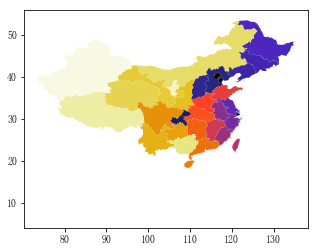

In [59]:
 %matplotlib inline 
#在jupyter中显示matplotlib图片，pandas的绘图也是基于matplotlib，所以也能显示
da_merge['num'][np.isnan(da_merge['num'])] = 1#填充缺失数据
da_merge.plot('num', k = 4, cmap = plt.cm.CMRmap)#图形初步，如图2所示

**终于得到个初步结果了，安慰……**